In [1]:
#'Aanand_19_01.csv'  ,         88%
#'Abhijeet_6205876348.csv'
#,'Aanand_19_02.csv'           95%
#'Deepanshu_21_1.csv', 
#'Achal_19_01.csv', 
#'Adit_18_02.csv', 
#'Deepanshu_21_02.csv', 
#'Mantavya_20_01.csv',
# 'Mantavya_20_02.csv',
# 'Pritesh_22_01.csv', 
#'Pritesh_22_02.csv', 
#'Rishab_20_01.csv', 
#'Rishab_20_02.csv']


In [2]:
import mne
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

path = r'Pritesh_22_02.csv'
sfreq = 120
#ch_names = ['Fp2', 'F4', 'F8', 'T8', 'Fp1', 'F3', 'F7', 'T7', 'Cz',
#            'C4', 'P4', 'O2', 'Pz', 'C3', 'P3', 'O1','stim']
df = pd.read_csv(path)
df.head()

timestamps            Fp1            Fp2             C3             C4  \
0  1.709557e+09   53332.245747   53492.105423   53909.591306   53349.277776   
1  1.709557e+09  106449.646527  106777.814839  107607.958628  106492.561876   
2  1.709557e+09  106578.258464  106898.916590  107734.424798  106613.797738   
3  1.709557e+09  106341.955822  106665.430268  107497.451603  106379.104421   
4  1.709557e+09  106402.171421  106729.266850  107558.874197  106442.136340   

             P7            P8            O1            O2            F7  \
0  35909.686793  36586.810540  35781.074855  36647.428471  35893.459427   
1  71583.070944  72944.828623  71404.435802  73092.886578  87907.399286   
2  71730.860678  73086.315165  71502.202332  73212.781335  86730.311719   
3  71485.572634  72815.277912  71339.124005  72907.814134  88655.333359   
4  71536.132280  72913.580884  71357.094807  73042.863374  86426.551512   

             F8            F3            F4            T7            T8  \
0  35498.638213  36138.479249  35106.499208  17383.532808  17500.343025   
1  87078.194270  88393.817949  86334.015290  53114.584460  52691.868268   
2  85779.870841  87217.266824  85155.988950  51940.715544  51520.413342   
3  87869.043692  89141.752022  87082.485805  53861.847980  53438.058905   
4  85473.428425  86912.031402  84852.362854  51638.162331  51216.787245   

             P3            P4  stim  sfreq  
0  17788.009976  17773.391935   0.0    125  
1  53483.656464  53107.476605   0.0    125  
2  52312.603869  51933.875911   0.0    125  
3  54229.712990  53854.471905   0.0    125  
4  52008.575440  51630.518035   0.0    125

In [3]:
temp = df.drop('stim', axis=1)

In [4]:
df = temp.drop('sfreq', axis=1)

In [5]:
df.head()

timestamps            Fp1            Fp2             C3             C4  \
0  1.709557e+09   53332.245747   53492.105423   53909.591306   53349.277776   
1  1.709557e+09  106449.646527  106777.814839  107607.958628  106492.561876   
2  1.709557e+09  106578.258464  106898.916590  107734.424798  106613.797738   
3  1.709557e+09  106341.955822  106665.430268  107497.451603  106379.104421   
4  1.709557e+09  106402.171421  106729.266850  107558.874197  106442.136340   

             P7            P8            O1            O2            F7  \
0  35909.686793  36586.810540  35781.074855  36647.428471  35893.459427   
1  71583.070944  72944.828623  71404.435802  73092.886578  87907.399286   
2  71730.860678  73086.315165  71502.202332  73212.781335  86730.311719   
3  71485.572634  72815.277912  71339.124005  72907.814134  88655.333359   
4  71536.132280  72913.580884  71357.094807  73042.863374  86426.551512   

             F8            F3            F4            T7            T8  \
0  35498.638213  36138.479249  35106.499208  17383.532808  17500.343025   
1  87078.194270  88393.817949  86334.015290  53114.584460  52691.868268   
2  85779.870841  87217.266824  85155.988950  51940.715544  51520.413342   
3  87869.043692  89141.752022  87082.485805  53861.847980  53438.058905   
4  85473.428425  86912.031402  84852.362854  51638.162331  51216.787245   

             P3            P4  
0  17788.009976  17773.391935  
1  53483.656464  53107.476605  
2  52312.603869  51933.875911  
3  54229.712990  53854.471905  
4  52008.575440  51630.518035

In [6]:
eeg_data = df.iloc[:,1:18].values.T
eeg_data[:-1] = eeg_data[:-1] * (10*(-6))
eeg_data[:-1] = eeg_data[:-1] / 4

ch_names = ['Fp1',	'Fp2'	,'C3'	,'C4'	,'P7'	,'P8'	,'O1'	,'O2'	,'F7'	,'F8'	,'F3'	,'F4'	,'T7'	,'T8'	,'P3'	,'P4']
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = ( ["eeg" ]*16))
raw = mne.io.RawArray(eeg_data, info)
raw.set_eeg_reference()

raw.filter(l_freq = 1,h_freq = 30)

Creating RawArray with float64 data, n_channels=16, n_times=52065
    Range : 0 ... 52064 =      0.000 ...   433.867 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 397 samples (3.308 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


<RawArray | 16 x 52065 (433.9 s), ~6.4 MB, data loaded>

In [7]:
# import mne
# from mne.channels import DigMontage

# # Define electrode positions
# positions = {
#     'Fp1': (-0.3268, 0.6235, 0.0351),  # Replace x_fp1, y_fp1, z_fp1 with actual coordinates
#     'Fp2': (0.3268, 0.6235, 0.0351),  # Replace x_fp2, y_fp2, z_fp2 with actual coordinates
#     'F7': (-0.873, 0.431, 0.032),  # Replace x_f7, y_f7, z_f7 with actual coordinates
#     'F3': (-0.514, 0.474, 0.034),  # Replace x_f3, y_f3, z_f3 with actual coordinates
#     'Fz': (0, 0.55, 0.035),  # Replace x_fz, y_fz, z_fz with actual coordinates
#     'F4': (0.514, 0.474, 0.034),  # Replace x_f4, y_f4, z_f4 with actual coordinates
#     'F8': (0.873, 0.431, 0.032),  # Replace x_f8, y_f8, z_f8 with actual coordinates
#     'T7': (-0.973, -0.041, 0.031),  # Replace x_t7, y_t7, z_t7 with actual coordinates
#     'C3': (-0.327, -0.103, 0.031),  # Replace x_c3, y_c3, z_c3 with actual coordinates
#     'Cz': (0, 0, 0.034),  # Replace x_cz, y_cz, z_cz with actual coordinates
#     'C4': (0.327, -0.103, 0.031),  # Replace x_c4, y_c4, z_c4 with actual coordinates
#     'T8': (0.973, -0.041, 0.031),  # Replace x_t8, y_t8, z_t8 with actual coordinates
#     'P7': (-0.7, -0.685, 0.032),  # Replace x_p7, y_p7, z_p7 with actual coordinates
#     'P3': (-0.273, -0.796, 0.034),  # Replace x_p3, y_p3, z_p3 with actual coordinates
#     'Pz': (0, -0.847, 0.034),  # Replace x_pz, y_pz, z_pz with actual coordinates
#     'P4': (0.273, -0.796, 0.034),  # Replace x_p4, y_p4, z_p4 with actual coordinates
#     # Add coordinates for other electrodes
# }

montage = 'standard_1020'
raw.set_montage(montage)


<RawArray | 16 x 52065 (433.9 s), ~6.4 MB, data loaded>

Fitting ICA to data using 16 channels (please be patient, this may take a while)


Selecting by number: 16 components
Fitting ICA took 2.6s.
Creating RawArray with float64 data, n_channels=16, n_times=52065
    Range : 0 ... 52064 =      0.000 ...   433.867 secs
Ready.
Using matplotlib as 2D backend.


C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1291946124.py:7: RuntimeWarning: Using n_components=16 (resulting in n_components_=16) may lead to an unstable mixing matrix estimation because the ratio between the largest (9.6) and smallest (6.7e-28) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 14
  ica.fit(raw)


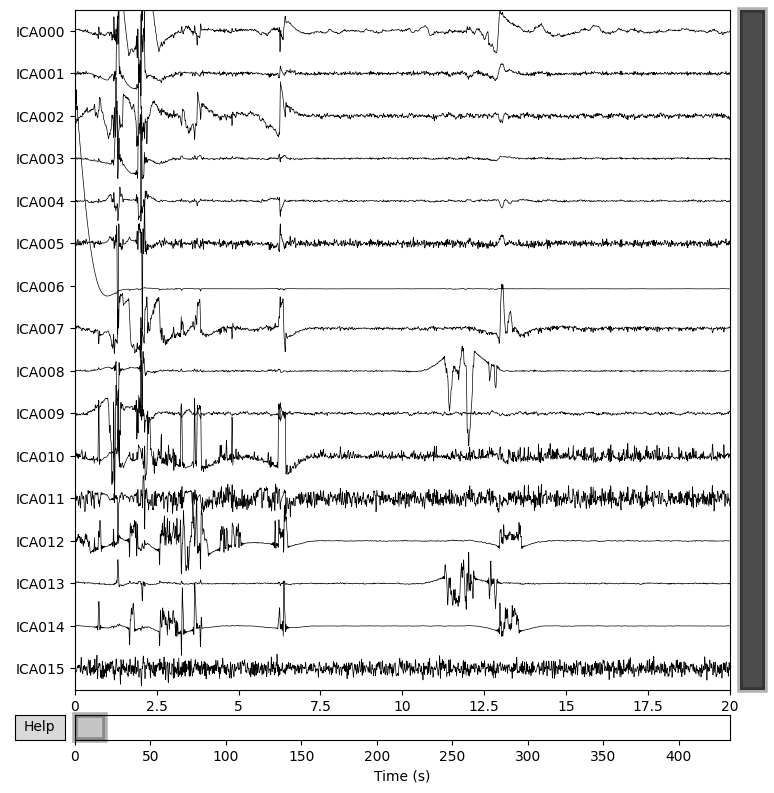

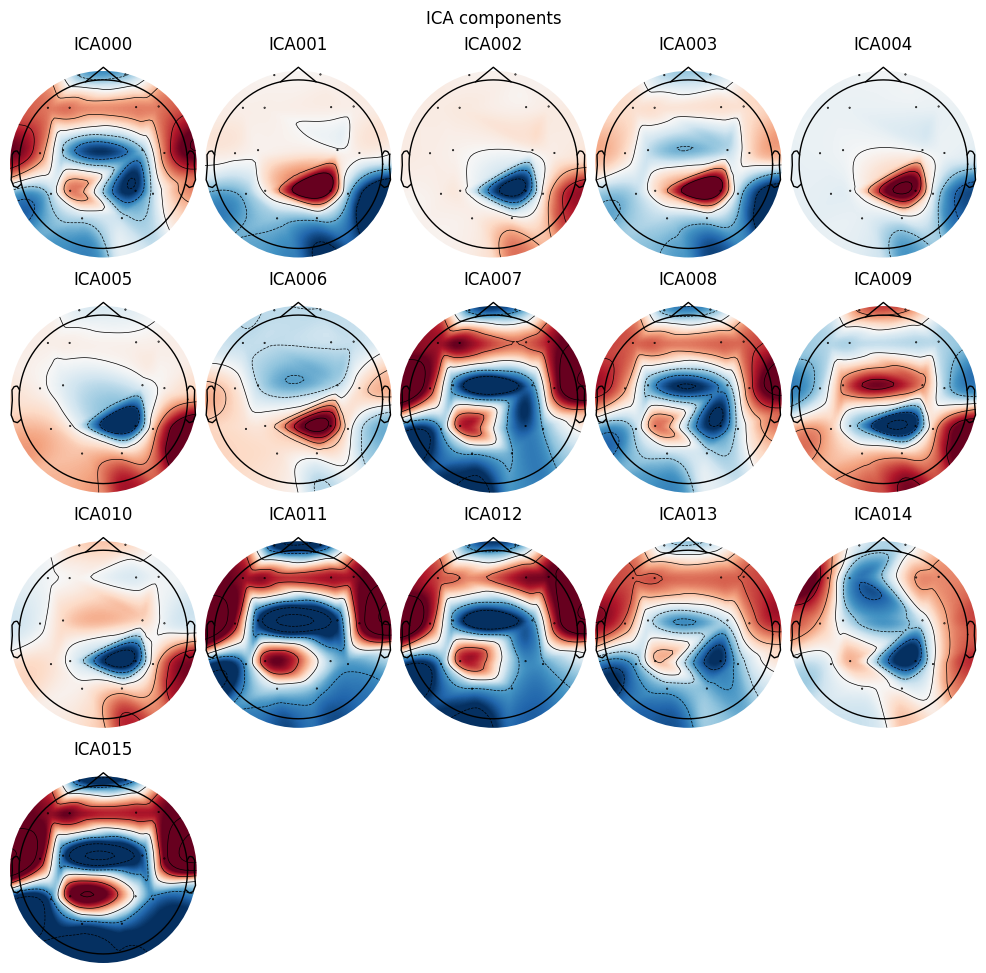

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
216 matching events found
No baseline correction applied
0 pro

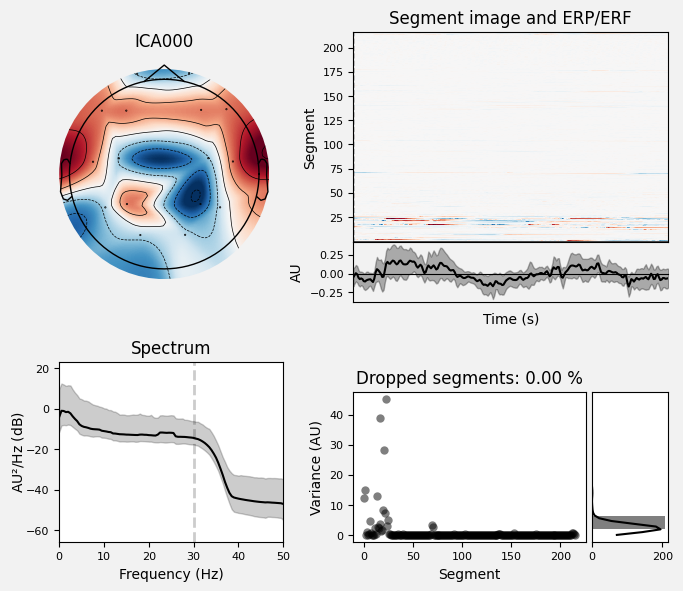

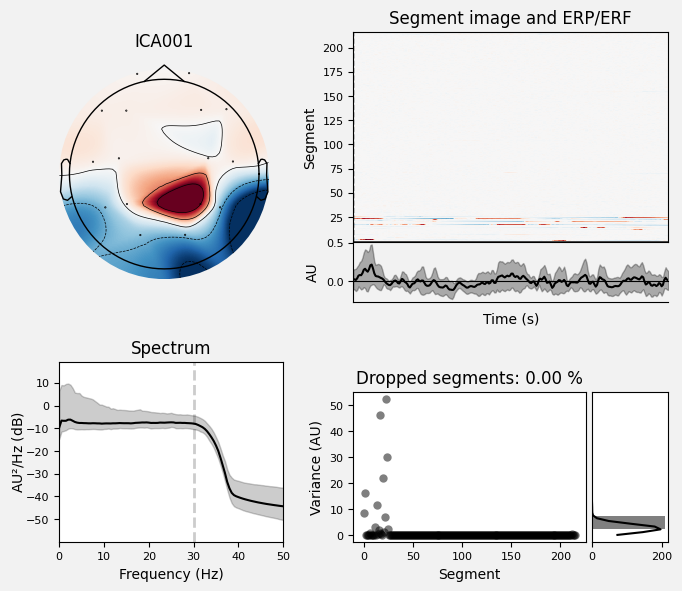

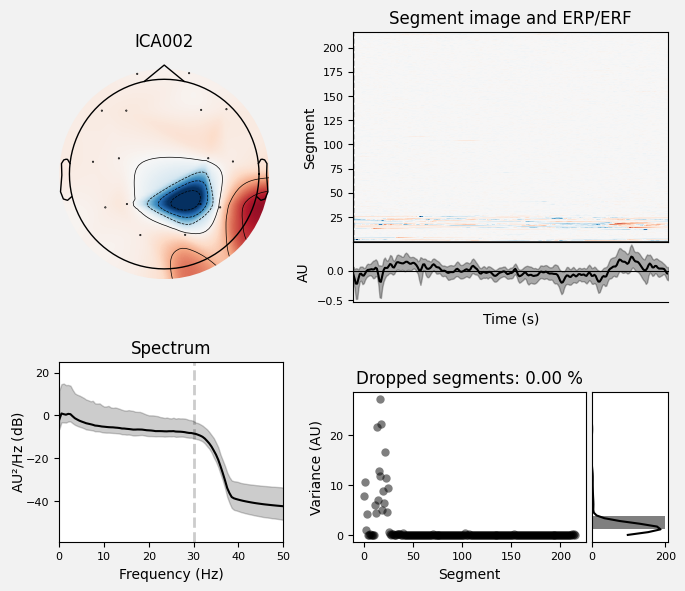

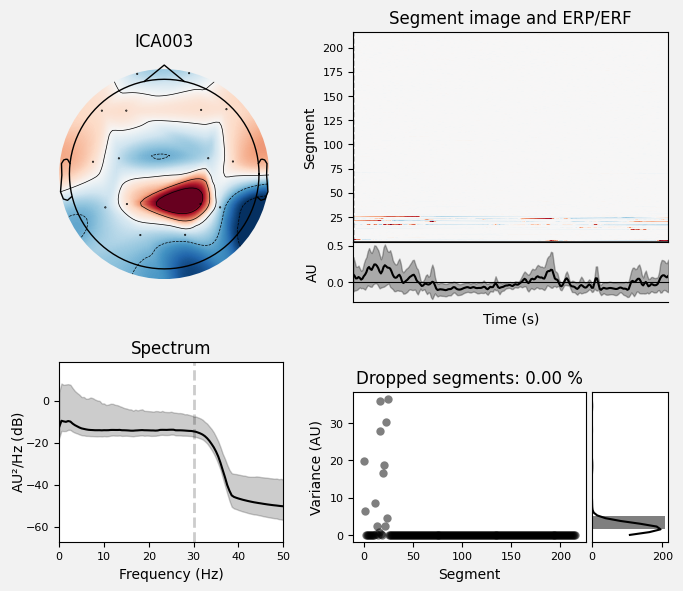

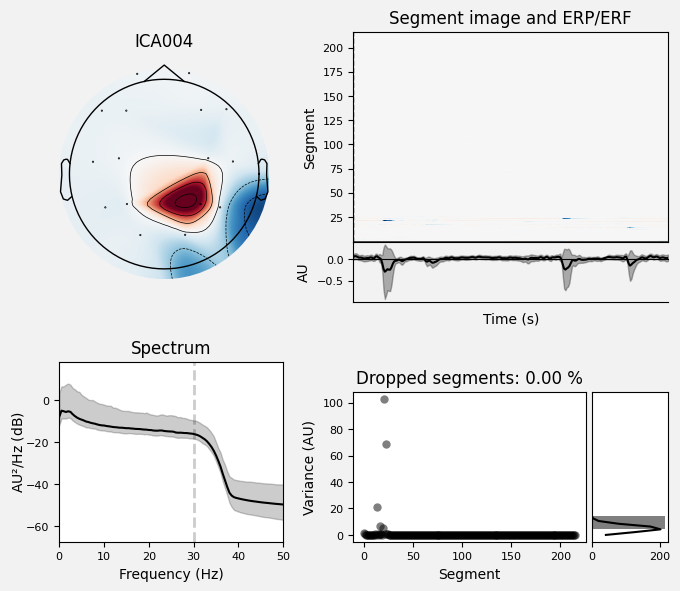

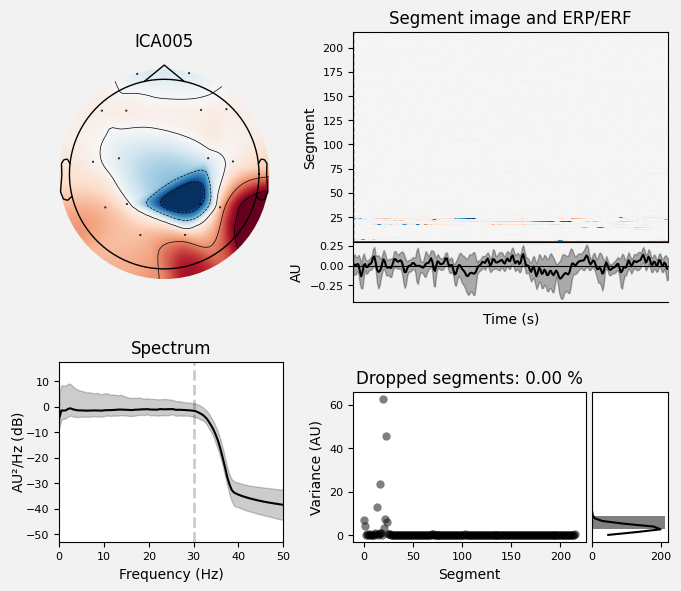

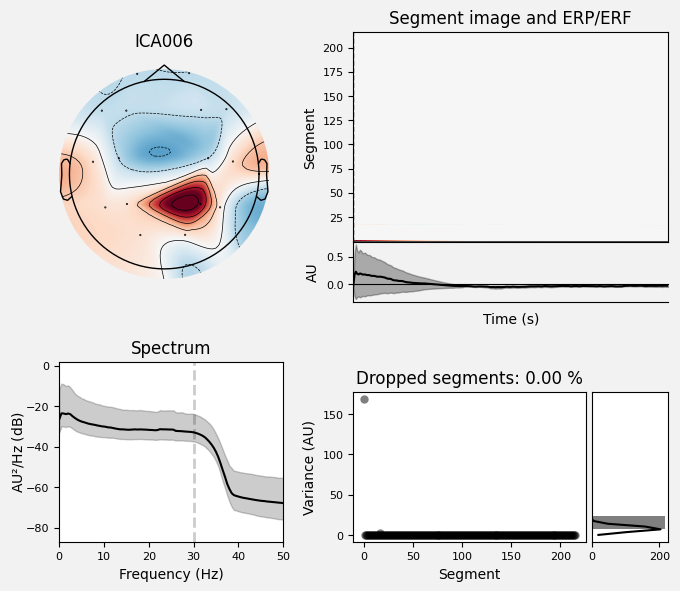

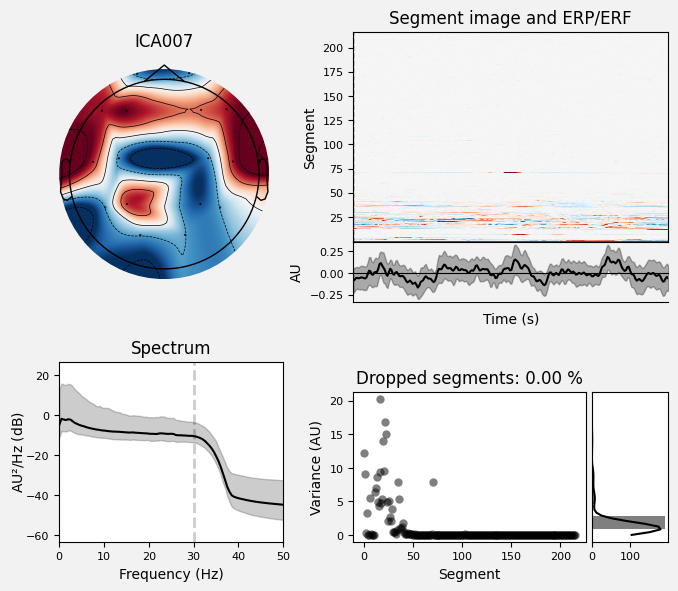

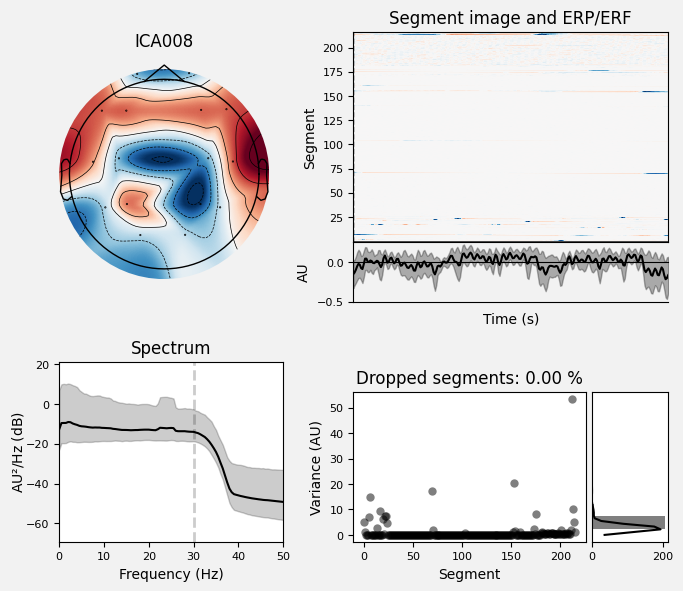

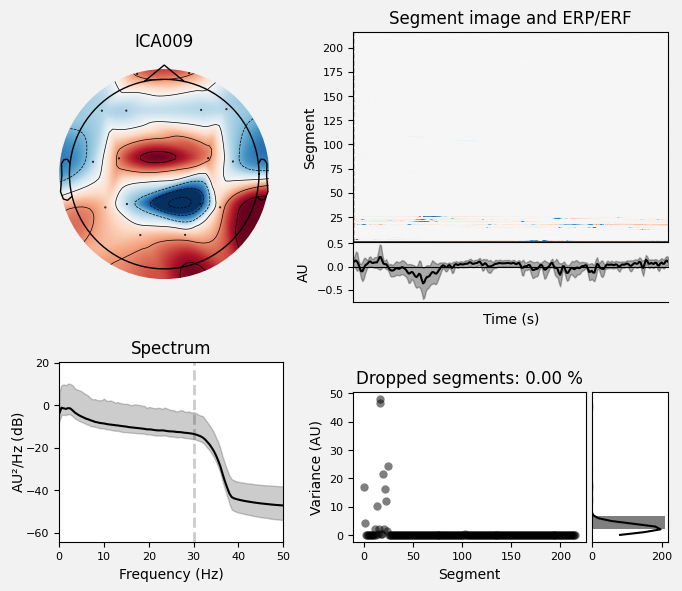

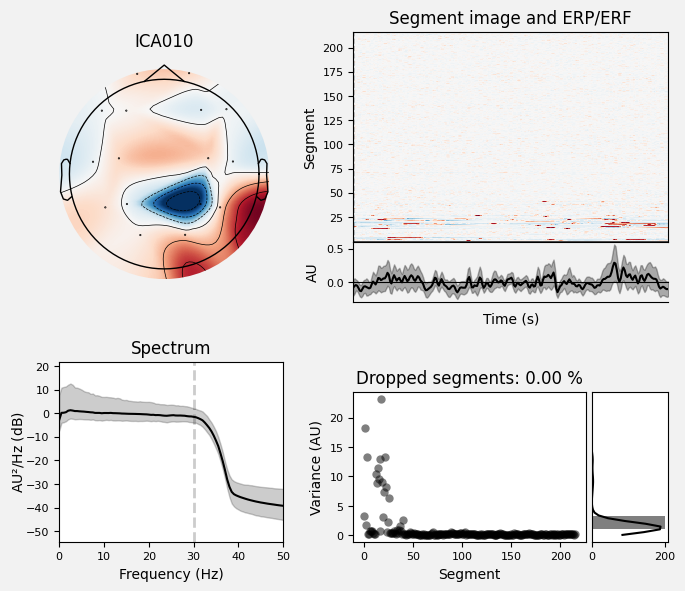

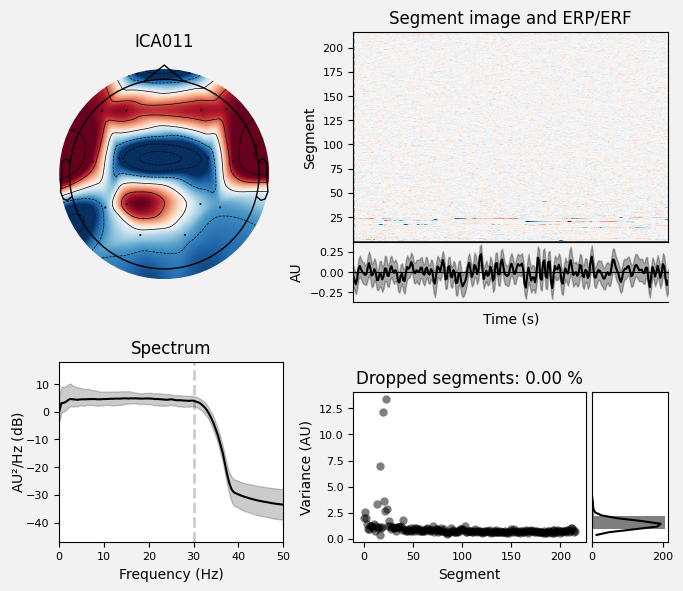

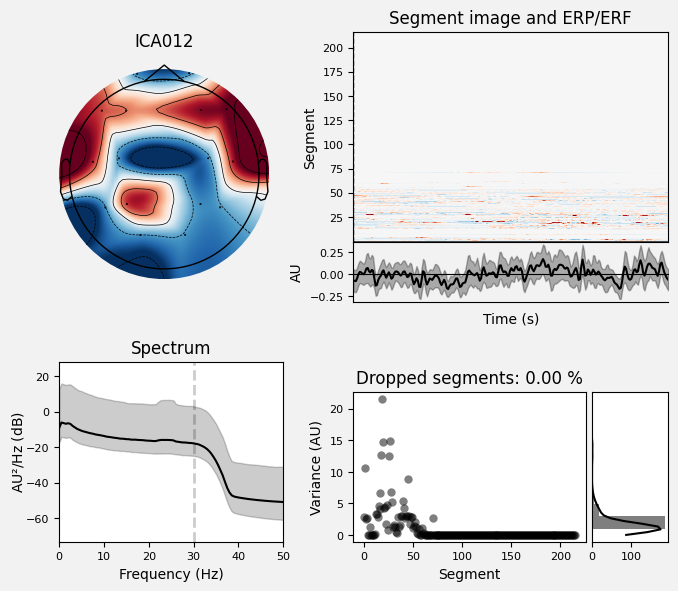

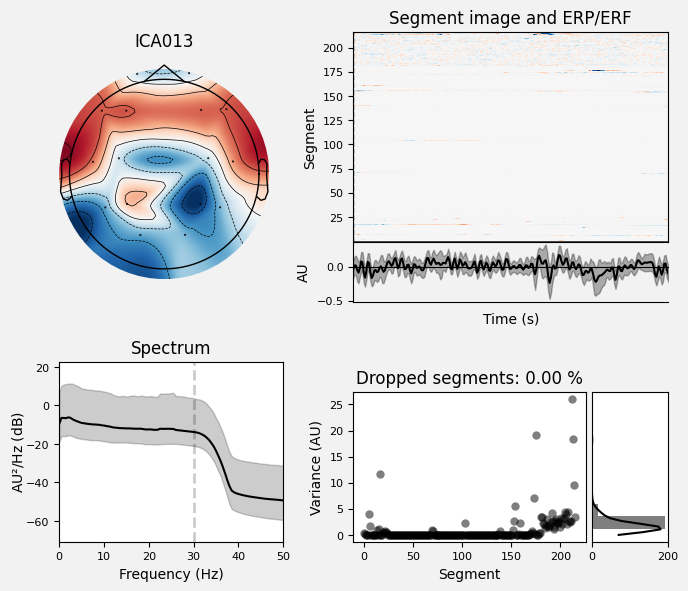

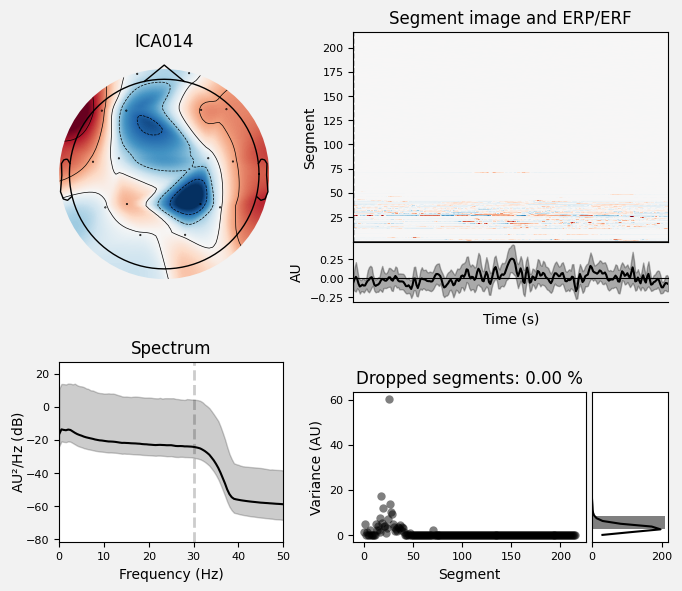

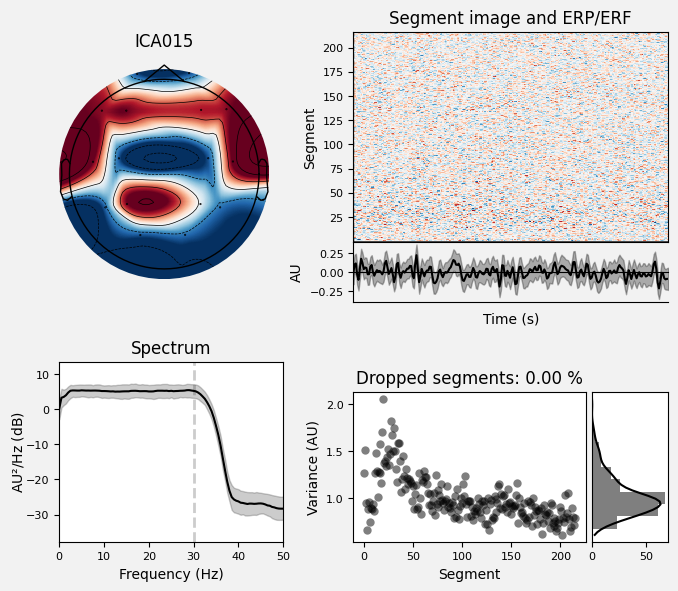

Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 0 ICA components
    Projecting back using 16 PCA components


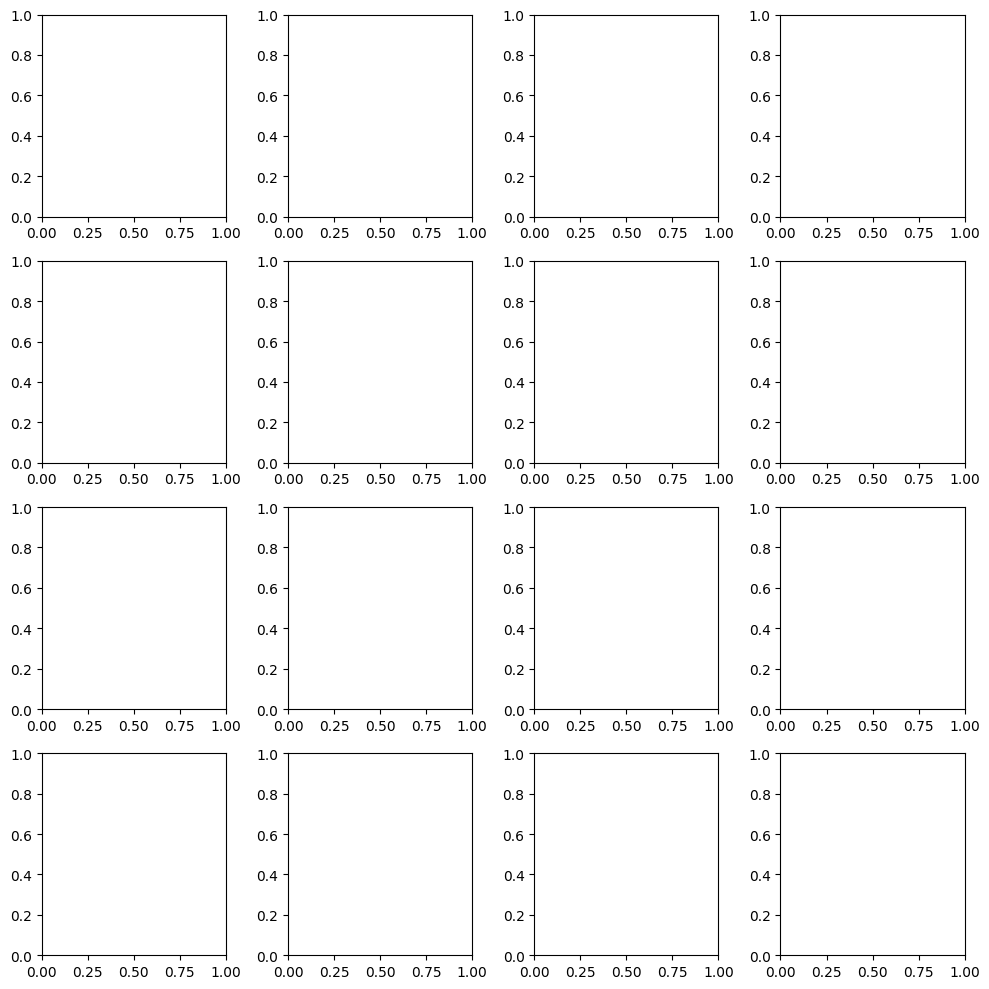

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
import mne

ica = ICA(n_components=16, random_state=97)
ica.fit(raw)

ica.plot_sources(inst=raw, picks=np.arange(16), show=True)

ica.plot_components(inst=raw, picks=np.arange(16), show=True)

ica.plot_properties(inst=raw, picks=np.arange(16), psd_args={'fmax': 50}, show=True)

plt.show()

raw_ica = ica.apply(raw)

fig, axes = plt.subplots(4, 4, figsize=(10, 10))

plt.tight_layout()
plt.show()


In [9]:
duration = 0.4

epochs=mne.make_fixed_length_epochs(raw_ica, duration = duration, overlap=0,preload=True)

Not setting metadata
1084 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1084 events and 48 original time points ...
0 bad epochs dropped


In [10]:
epochs.drop_bad()  # This will drop bad epochs
num_epochs = len(epochs)
print("Total number of epochs created:", num_epochs)

Total number of epochs created: 1084


In [11]:
epochs.get_data()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1251544707.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data()


array([[[ 1.15535255e-03, -1.48033312e+05, -1.88041238e+05, ...,
         -5.16015480e+04, -5.10420563e+04, -5.02646822e+04],
        [ 2.71231744e-03, -1.50157878e+05, -1.90732790e+05, ...,
         -5.24679918e+04, -5.18741245e+04, -5.10509455e+04],
        [ 3.93010373e-03, -1.55486528e+05, -1.97522462e+05, ...,
         -5.44808104e+04, -5.37991076e+04, -5.28980408e+04],
        ...,
        [ 4.48392874e-03,  8.80413352e+04,  1.11638759e+05, ...,
          3.27651937e+04,  3.28418003e+04,  3.20144725e+04],
        [-1.05426338e-03,  8.15726621e+04,  1.03405482e+05, ...,
          3.02843286e+04,  3.04490863e+04,  2.97043375e+04],
        [-2.59056181e-03,  5.64123569e+05,  7.17728823e+05, ...,
          1.79780899e+05,  1.74740519e+05,  1.73737990e+05]],

       [[-4.77025819e+04, -4.40617119e+04, -4.11469229e+04, ...,
          1.92888972e+04,  1.83075298e+04,  1.62290825e+04],
        [-4.84522598e+04, -4.47973225e+04, -4.18777585e+04, ...,
          1.90278608e+04,  1.80715178e

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 48, using nperseg = 48
  warnings.warn('nperseg = {0:d} is greater than input length '


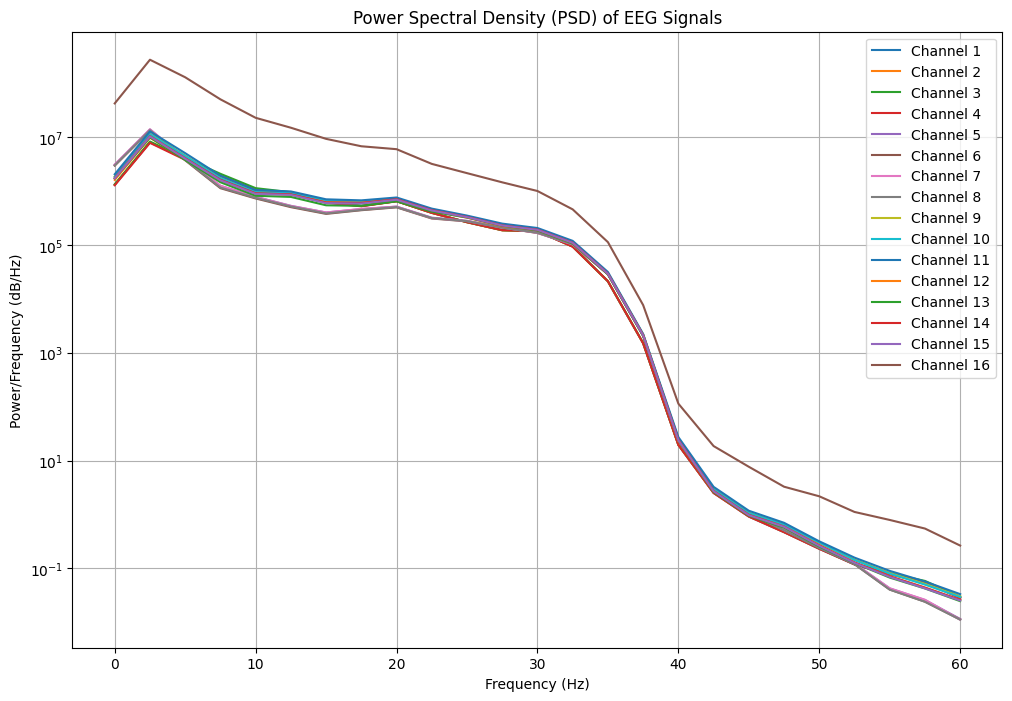

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

data = epochs.get_data(copy=True)
sfreq = epochs.info['sfreq']
n_epochs, n_channels, n_time_points = data.shape

plt.figure(figsize=(12, 8))

for channel_idx in range(n_channels):
    freqs, psd = welch(data[:, channel_idx, :], fs=sfreq, axis=-1)
    
    avg_psd = np.mean(psd, axis=0)
    
    plt.semilogy(freqs, avg_psd, label=f'Channel {channel_idx + 1}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density (PSD) of EEG Signals')
plt.legend()
plt.grid(True)
plt.show()


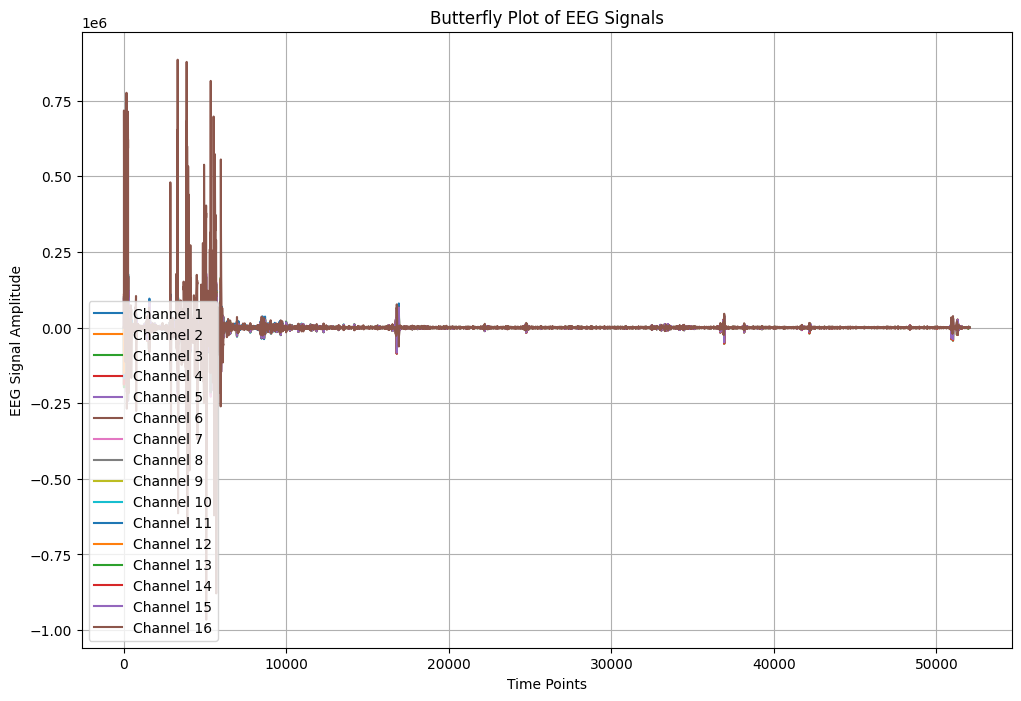

In [13]:
data = epochs.get_data(copy=True) 
n_epochs, n_channels, n_time_points = data.shape
plt.figure(figsize=(12, 8))

for channel_idx in range(n_channels):
    channel_data = data[:, channel_idx, :].flatten()
    time_points = np.arange(n_time_points * n_epochs)
    plt.plot(time_points, channel_data, label=f'Channel {channel_idx + 1}')


plt.xlabel('Time Points')
plt.ylabel('EEG Signal Amplitude')
plt.title('Butterfly Plot of EEG Signals')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import mne

eeg_data = epochs.get_data()

condition_ranges = {'lev1': (100/duration, 200/duration),
                    'lev2': (280/duration, 380/duration),
                    'lev3': (420/duration, 520/duration)}

epochs_by_condition = {}
selected_epochs = []

for condition, (start_epoch, end_epoch) in condition_ranges.items():
    start_epoch = int(start_epoch)
    end_epoch = int(end_epoch)
    condition_epochs = epochs[start_epoch:end_epoch+1].copy()
    epochs_by_condition[condition] = condition_epochs
    selected_epochs.append(condition_epochs)

selected_epochs = mne.concatenate_epochs(selected_epochs)

for condition, epoch_data in epochs_by_condition.items():
    num_epochs = len(epoch_data)
    print(f"Number of epochs for {condition}: {num_epochs}")

print(f"Total number of selected epochs: {len(selected_epochs)}")


Not setting metadata
536 matching events found


No baseline correction applied
Number of epochs for lev1: 251
Number of epochs for lev2: 251
Number of epochs for lev3: 34
Total number of selected epochs: 536


C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\776002152.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()


In [15]:

condition_of_interest = 'lev1'
epoch_array_for_condition = epochs_by_condition[condition_of_interest]
print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


Epoch array shape for condition lev1: (251, 16, 48)


C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1489624503.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


In [16]:
condition_of_interest = 'lev1'
epoch_array_for_condition = epochs_by_condition[condition_of_interest]

In [17]:
import pandas as pd
import numpy as np
from scipy.signal import welch



def calculate_psd_features(epoch_data, sfreq):
    psd_frequencies, psd_values = welch(epoch_data, fs=sfreq)
    psd_means = np.mean(psd_values, axis=1)  # Calculate mean PSD values for each channel
    psd_variances = np.var(psd_values, axis=1)  # Calculate variance of PSD values for each channel
    psd_std_devs = np.std(psd_values, axis=1)  # Calculate standard deviation of PSD values for each channel

    freq_min = 14
    freq_max = 30

    # Find the indices corresponding to the frequency range of interest
    idx_min = np.argmax(psd_frequencies > freq_min) - 1
    idx_max = np.argmax(psd_frequencies > freq_max)

    # Extract the PSD within the specified frequency range
    psd_values_alpha_band = psd_values[:, idx_min:idx_max]
    psd_means_alpha_band = np.mean(psd_values_alpha_band, axis=1)  # Calculate mean PSD values in alpha band for each channel
    psd_variances_alpha_band = np.var(psd_values_alpha_band, axis=1)  # Calculate variance of PSD values in alpha band for each channel
    psd_std_devs_alpha_band = np.std(psd_values_alpha_band, axis=1)  # Calculate standard deviation of PSD values in alpha band for each channel
    return psd_means_alpha_band, psd_variances_alpha_band, psd_std_devs_alpha_band

channel_names = epochs.ch_names
sfreq = epochs.info['sfreq']  # Sampling frequency

columns = [f'{feature}_{channel}' for feature in ['mean_psd', 'variance_psd', 'standarddev_psd'] for channel in channel_names]
columns.append('condition')
feature_df = pd.DataFrame(columns=columns)

def append_epoch_data(epoch_array, condition_label):
    global feature_df
    for epoch in epoch_array:
        psd_means, psd_variances, psd_std_devs = calculate_psd_features(epoch, sfreq)
        epoch_features = np.concatenate([psd_means, psd_variances, psd_std_devs])
        epoch_features = np.append(epoch_features, condition_label)
        epoch_df = pd.DataFrame([epoch_features], columns=columns)
        feature_df = pd.concat([feature_df, epoch_df], ignore_index=True)

append_epoch_data(epochs_by_condition['lev1'], 'lev1')
append_epoch_data(epochs_by_condition['lev2'], 'lev2')
append_epoch_data(epochs_by_condition['lev3'], 'lev3')

print("Shape of feature DataFrame:", feature_df.shape)
print(feature_df.head())


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 48, using nperseg = 48
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of feature DataFrame: (536, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   12550.54047837905   12514.27332606502   12576.78831765009   
1   10544.76226630466   10417.16436539311  10441.554963600953   
2   5854.195368404395   5869.964512982185  5957.0837454715565   
3  14522.845408585412  14627.159613454263  14620.700055268895   
4   9321.623991471355   9310.934651340243   9173.412390350784   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   12731.79354413351   12151.02636943162  13974.719886072393   
1  10494.852212718972  10802.121929965771   12563.67088122176   
2    5859.73706277201   5742.440382416085   6064.967999690394   
3  14618.609444708574  14759.864871472955   19977.27008880786   
4   9231.812179188468   9796.413328813978  13158.131816621648   

         mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   7271.50365902753  14772.792219531673  12327.380279494555   
1  7269.629460650491  11825.357687515685  12508.0729

In [18]:
# Rename columns using a dictionary
new_column_names = {
    'mean_psd_Fp1': 'mean_psd_Fp1',
    'mean_psd_Fp2': 'mean_psd_Fp2',
    'mean_psd_C3': 'mean_psd_C3',
    'mean_psd_C4': 'mean_psd_C4',
    'mean_psd_P7': 'mean_psd_P7',
    'mean_psd_P8': 'mean_psd_P8',
    'mean_psd_O1': 'mean_psd_O1',
    'mean_psd_O2': 'mean_psd_O2',
    'mean_psd_F7': 'mean_psd_F7',
    'mean_psd_F8': 'mean_psd_F8',
    'standarddev_psd_Fp1': 'stddev_psd_Fp1',
    'standarddev_psd_Fp2': 'stddev_psd_Fp2',
    'standarddev_psd_C3': 'stddev_psd_C3',
    'standarddev_psd_C4': 'stddev_psd_C4',
    'standarddev_psd_P7': 'stddev_psd_P7',
    'standarddev_psd_P8': 'stddev_psd_P8',
    'standarddev_psd_O1': 'stddev_psd_O1',
    'standarddev_psd_O2': 'stddev_psd_O2',
    'standarddev_psd_F7': 'stddev_psd_F7',
    'standarddev_psd_F8': 'stddev_psd_F8'
}

# Rename columns using the rename() method
feature_df.rename(columns=new_column_names, inplace=True)

# Print the DataFrame
print(feature_df.head())


         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   12550.54047837905   12514.27332606502   12576.78831765009   
1   10544.76226630466   10417.16436539311  10441.554963600953   
2   5854.195368404395   5869.964512982185  5957.0837454715565   
3  14522.845408585412  14627.159613454263  14620.700055268895   
4   9321.623991471355   9310.934651340243   9173.412390350784   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   12731.79354413351   12151.02636943162  13974.719886072393   
1  10494.852212718972  10802.121929965771   12563.67088122176   
2    5859.73706277201   5742.440382416085   6064.967999690394   
3  14618.609444708574  14759.864871472955   19977.27008880786   
4   9231.812179188468   9796.413328813978  13158.131816621648   

         mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   7271.50365902753  14772.792219531673  12327.380279494555   
1  7269.629460650491  11825.357687515685  12508.072973159817   
2  5539.855968276192   933

In [19]:
feature_df

mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0     12550.54047837905   12514.27332606502   12576.78831765009   
1     10544.76226630466   10417.16436539311  10441.554963600953   
2     5854.195368404395   5869.964512982185  5957.0837454715565   
3    14522.845408585412  14627.159613454263  14620.700055268895   
4     9321.623991471355   9310.934651340243   9173.412390350784   
..                  ...                 ...                 ...   
531   2239.357911473886  2255.8854488977704   2214.693177723786   
532  1605.5065373514017  1632.5162394950448  1658.5465557058374   
533   4127.732719716101   4173.791702879374   4186.578058550834   
534   3225.057156351172   3311.425784233189  3242.3138225900757   
535  4088.2086350892873    4152.80791037804   4102.153986938467   

            mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0     12731.79354413351   12151.02636943162  13974.719886072393   
1    10494.852212718972  10802.121929965771   12563.67088122176   
2      5859.73706277201   5742.440382416085   6064.967999690394   
3    14618.609444708574  14759.864871472955   19977.27008880786   
4     9231.812179188468   9796.413328813978  13158.131816621648   
..                  ...                 ...                 ...   
531   2233.118204320516  2126.6201193709076   3645.888277307292   
532  1636.8771423807564  1572.3392091315625   3078.974542499951   
533   4252.388338351066   3942.289503456516   6191.875711418781   
534  3275.8161099910567  3305.9487743140057  4528.6190018397165   
535   4156.470829888078  4068.1469330140644   5585.137395120722   

            mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0      7271.50365902753  14772.792219531673  12327.380279494555   
1     7269.629460650491  11825.357687515685  12508.072973159817   
2     5539.855968276192   9332.789455029044   9801.279066271165   
3     7923.593839151344  16042.656348335531  21436.147831610586   
4     8231.313038714568  11859.040968806921  14185.873552308192   
..                  ...                 ...                 ...   
531   1580.454514365436    2539.06061621248   4121.887892890547   
532   1548.241014227135  1623.2003392891668   5568.560225283549   
533   1611.639365066872   4080.872671650396  11635.703302731508   
534  1502.2358712886648  3228.7065981104256   6709.491624893084   
535  2355.4174079381773   4698.630004677478   8652.613616598284   

            mean_psd_F8  ...       stddev_psd_O2       stddev_psd_F7  \
0    14595.333130466599  ...   9695.735506334004  10956.734662289284   
1    12306.226508311709  ...   5522.571640336458   5961.716513541489   
2     7465.493535187229  ...   5899.872931696327    6741.92200562423   
3     24006.63219853715  ...  14080.860477179056  19354.203285591062   
4    18140.033568135113  ...   17700.06334850639  18416.758791045304   
..                  ...  ...                 ...                 ...   
531   4066.136702108419  ...  2163.1314528702987  2046.2951249920704   
532   5556.178251911157  ...   1306.386516705052   3964.798699059359   
533  11374.383656617238  ...   4062.655652538859  12521.632085032228   
534   6780.709483342892  ...   2670.136812036491   5505.437575798927   
535   8627.238179028427  ...   4469.106222612277   7080.381203569627   

          stddev_psd_F8  standarddev_psd_F3  standarddev_psd_F4  \
0    11519.461846942575  10710.393301565147  10686.496488875633   
1     7244.789733484034   5998.893656615888   5957.647660865627   
2     4709.723525924195  6664.9764310131495   6592.313425389432   
3    22910.772137264456   19448.71080433495  19318.979621001145   
4    22770.091886792117  18523.518829654775   18410.69164156278   
..                  ...                 ...                 ...   
531   2022.213368342493  2054.5703305507873  2180.6603812606204   
532  3936.7552935593435   3946.473393240201  4000.0889772764913   
533  12276.353575524388  12427.024747439546  12301.186612602518   
534   5611.246875890252   5649.759525936171   5610.2309504411

In [20]:
# import matplotlib.pyplot as plt

# def plot_psd_features(psd_features, freqs, ch_names):
#     num_channels = len(ch_names)
    
#     fig, axs = plt.subplots(num_channels, figsize=(10, 6*num_channels))
#     for i, (channel_psd, channel_name) in enumerate(zip(psd_features, ch_names)):
#         axs[i].plot(freqs, channel_psd, label=channel_name)
#         axs[i].set_title(f'Power Spectral Density (PSD) for Channel {channel_name}')
#         axs[i].set_xlabel('Frequency (Hz)')
#         axs[i].set_ylabel('PSD')
#         axs[i].grid(True)
#         axs[i].legend()

#     plt.tight_layout()
#     plt.show()

# psd_frequencies, psd_values = welch(epoch_data[0], fs=sfreq)

# # Example usage:
# plot_psd_features(psd_values,  psd_frequencies, ch_names


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = feature_df.drop(columns=['condition'])
y = feature_df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier on the training data
log_reg_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = log_reg_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5462962962962963


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X = feature_df.drop(columns=['condition'])
y = feature_df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5185185185185185


Not setting metadata
8677 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8677 events and 6 original time points ...
0 bad epochs dropped
Not setting metadata
4279 matching events found


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 6, using nperseg = 6
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()


No baseline correction applied
Number of epochs for lev1: 2001
Number of epochs for lev2: 2001
Number of epochs for lev3: 277
Total number of selected epochs: 4279
Epoch array shape for condition lev1: (2001, 16, 6)


C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 6, using nperseg = 6
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of feature DataFrame: (4279, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   19068.12749224754  18992.106193025556  19203.401532806365   
1   998.0188184966232  1012.3309580244553   979.4904887851435   
2  180.76434921479685   181.7641113558192  180.56025153405034   
3   1687.976226473455   1661.793317158602   1658.257220576659   
4   7416.064335565514   7327.352687758499   7473.854779165039   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0    19271.1782552114  18012.229068853907   16385.78113825958   
1   909.1321931561376   982.5748749921783  1567.5717537953617   
2   180.9147875759179  189.51535013069395   380.2528362631856   
3  1676.6566761987226  1547.7963077299394  1689.0145841582694   
4   7717.367056719218   7284.079428044359   8689.955697484449   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  24229.420426395347  16927.503058462447  30661.857757382175   
1   939.9459876214419    1995.73218715165  3439.9

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 12, using nperseg = 12
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 12, using nperseg = 12
 

Shape of feature DataFrame: (2140, 49)
        mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  23193.18091277742  23140.720343884375  22980.778932031943   
1  5177.977156382403  5300.9749390546685   5182.051035423404   
2  5233.303381748995   5400.829417292362   5174.774683656222   
3  6069.307561708639   6221.505944678486   6222.622078021792   
4   650.097306258852   628.7752848892751    655.841442216074   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  23281.032439141894  22630.628078256606  24559.080511519842   
1   5153.560499870185   4861.440711773161   5550.577520367242   
2   5280.066955916256   5115.789955284804   6042.007814950539   
3   6122.194012713099   6405.722888722964   9021.643694843637   
4    651.382973367432    600.033362053569  1384.4551218245767   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  29266.183668849193    25461.9901051911  32218.421831362648   
1  1167.4896305150012    9878.03373901454   6160.272341

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 24, using nperseg = 24
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 24, using nperseg = 24
 

Number of epochs for lev1: 501
Number of epochs for lev2: 501
Number of epochs for lev3: 69
Total number of selected epochs: 1071
Epoch array shape for condition lev1: (501, 16, 24)
Shape of feature DataFrame: (1071, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   6378.688137270345   6472.691471325876    6368.09478117413   
1  15580.097040273326  15807.516337297977  15941.650562414992   
2   8021.885875293461   7837.173382101739  7780.0611425967045   
3    4652.05223922746   4727.074056578293  4720.7295744882485   
4   7081.479381890995  7178.8122041075785   7053.610993301634   

         mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  6330.930928940131   6442.799516639806   8348.485090728713   
1   15564.2707560928  16163.282489343324  20116.179583100693   
2  8017.112794894262   8255.272278098439    9254.31093183703   
3  4673.716772417681   4858.268767756295   4814.730545899661   
4  7306.978305390738   6705.589971225765   9040.069554630245   

   

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 36, using nperseg = 36
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 36, using nperseg = 36
 

Shape of feature DataFrame: (714, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  21270.919823719076  21278.520959922684   21272.41986408864   
1   8767.497725316365    8881.99252895512   8978.290558759929   
2  10033.991363707553   10048.34025911679  10122.413771944814   
3   8047.515179744357   8113.135428360861    8122.86543130134   
4   1323.539373080395  1324.8462272404631  1317.6169046114735   

          mean_psd_C4        mean_psd_P7         mean_psd_P8  \
0   21398.26449517283  20483.38200851067   22523.62449000867   
1   8799.028537088532  8949.372819474798  11197.596621823543   
2   9951.435180843257  10415.90801253446  11349.015814588209   
3   8130.594562061445  7961.721110683279   8771.912832290449   
4  1305.5010476742855   1276.94946479633  1966.5659590831583   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  24424.519505774882   21212.86447891023  29502.495556790087   
1   5034.055483200796   9392.215213418378   12634.797659

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 48, using nperseg = 48
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 48, using nperseg = 48
 

Shape of feature DataFrame: (536, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   12550.54047837905   12514.27332606502   12576.78831765009   
1   10544.76226630466   10417.16436539311  10441.554963600953   
2   5854.195368404395   5869.964512982185  5957.0837454715565   
3  14522.845408585412  14627.159613454263  14620.700055268895   
4   9321.623991471355   9310.934651340243   9173.412390350784   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   12731.79354413351   12151.02636943162  13974.719886072393   
1  10494.852212718972  10802.121929965771   12563.67088122176   
2    5859.73706277201   5742.440382416085   6064.967999690394   
3  14618.609444708574  14759.864871472955   19977.27008880786   
4   9231.812179188468   9796.413328813978  13158.131816621648   

         mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   7271.50365902753  14772.792219531673  12327.380279494555   
1  7269.629460650491  11825.357687515685  12508.0729

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 60, using nperseg = 60
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 60, using nperseg = 60
 

Shape of feature DataFrame: (429, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  13526.886459273472  13533.867735931399  13642.870895130687   
1    7956.49727069469   8054.744762637973    8035.22307669313   
2   2344.264310248291    2363.87165915386  2323.7061116306368   
3  11170.083407546786  11188.896514000879  11044.198311285645   
4  11506.005350050022  11329.111170029979  11371.011394764048   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  13648.769434922226  13455.212747945277  15615.437316916334   
1   8077.685489730217   8187.916559929303   9294.651528448794   
2  2328.5594659738467  2247.7483860391803  3222.8286259584065   
3  11118.407222795006  11690.177444415454  15559.006673088785   
4   11436.52550048914  11254.740220069974  13505.811054131298   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   7974.370915482386  15700.901000861191   15085.40464494782   
1   5653.604461410668  10268.562047405158  12373.4

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 72, using nperseg = 72
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 72, using nperseg = 72
 

Shape of feature DataFrame: (359, 49)
         mean_psd_Fp1        mean_psd_Fp2        mean_psd_C3  \
0    8570.09925114113   8577.619062803056    8663.8956034143   
1   7793.424397604321   7623.310489540297  7626.475213411567   
2  2960.3428194111616   2985.753076027629  2992.055106578098   
3  10239.214388044587  10285.308836304614   10119.0932737952   
4   47665.11137687845   47835.62715169348  47781.20275665787   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   8673.179697046617   8300.560398452468   9855.665874864855   
1   7755.314789614136   8014.255357194904   9302.957391158134   
2  2971.4367702677546  3003.0110722500463  3558.9917122043407   
3  10192.713770425835  10656.904001322622  14038.151205395827   
4   47992.47407146664  46246.456978882234    52778.5110890601   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  7955.8036900936595   8520.687022281192  12674.484220799297   
1   6745.511846475792    8267.18270677482   8986.5418712

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 84, using nperseg = 84
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 84, using nperseg = 84
 

Shape of feature DataFrame: (306, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   5089.410105596033   5064.534441012619   5098.357656670591   
1   7636.287845779351   7541.331661390703   7558.296291269878   
2   2596.239037044292  2623.5313001262916  2606.4972137866853   
3   7298.278243320422   7259.536427871373   7189.198324423767   
4  47114.369003539236   47420.90076298272   47301.50145426421   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   5181.066176860308   5001.437794217433    6377.00378514223   
1   7620.886310730354   7837.648476878175   9156.282500299978   
2  2598.1044557079813   2604.917814435569   3333.168959695672   
3   7229.365567901328   7544.390522651121  10268.558888293923   
4   47537.68335974274  45948.499786407585   52625.28209081742   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0    1844.42133168065   5853.434740380214   6566.221116153627   
1  6172.1545790669625   8047.451905391112   9434.8

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 96, using nperseg = 96
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 96, using nperseg = 96
 

Shape of feature DataFrame: (269, 49)
        mean_psd_Fp1       mean_psd_Fp2         mean_psd_C3  \
0  8602.589856791534   8537.42262203991   8594.094608594396   
1  3466.514023016597  3499.745443922056  3472.6931979369047   
2  3137.762941038659  3088.637590603192   3063.292612802258   
3  4194.349640378853  4158.438481701076   4203.777510363661   
4  6533.275387525535    6595.1475590416   6529.712929321484   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   8616.902121693358   8780.162504058162  10093.873122091707   
1   3470.310095679272  3449.7968490910716    4609.85379367582   
2  3116.2573288363205    3120.28072138474    4454.77761605825   
3   4147.949023397224   4248.491527139309    6254.72319248521   
4   6570.009083872377   6448.186646116775   8442.489710815711   

          mean_psd_O1        mean_psd_O2         mean_psd_F7  \
0   6098.499486212248   9348.76030127858  10242.500061081028   
1  2225.2708385853484  5089.346396675539   4627.774532505196   


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 108, using nperseg = 108
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 108, using nperseg = 1

Shape of feature DataFrame: (240, 49)
        mean_psd_Fp1       mean_psd_Fp2         mean_psd_C3  \
0  9863.830600658597  9830.932458051828   9888.690746706594   
1  5335.578761157241  5373.202767084977   5352.508809788137   
2  10526.09360976535  10492.05614943874  10471.519316555583   
3  5448.354640131585  5462.953560749607   5410.244435627643   
4  7534.782542995446  7622.309530303049   7605.386249235413   

          mean_psd_C4        mean_psd_P7         mean_psd_P8  \
0   9903.699988327273   9957.05159058548   11535.98193570323   
1   5341.058397843417  5327.758693890087   7186.213385956984   
2  10560.590557302608  10263.07767121332  12144.830777661913   
3    5374.87237857678  5612.300262754773   7034.237107325116   
4   7643.642382599387  7430.355814714752    9926.19877554025   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   6704.297107451598   10905.19892848006  11606.614372534947   
1  3146.7325121110835   6769.319096876821   7372.786058389864   
2  

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 120, using nperseg = 120
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 120, using nperseg = 1

Shape of feature DataFrame: (215, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   8620.254982184299   8509.377760040881   8562.667207744671   
1  11761.145583985272  11791.161184253495  11745.586798053146   
2  55759.654631590536   56168.41122109351    56037.7463289519   
3  5076.9544972092435   5061.970006493377   5020.283128417911   
4   4157.355051272187   4144.214555311503   4185.935710308231   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   8608.501486498615   8831.617331843865  10048.330874458463   
1  11714.410127744157  11881.657345583282  15821.988088124797   
2   56276.25721295213   54240.40951119146  61547.131268451565   
3   5066.768111079098   5016.995613162706   6924.381601009427   
4   4251.414510951794   4126.353319786318    5376.98069008611   

         mean_psd_O1        mean_psd_O2         mean_psd_F7  \
0  6336.445722798696  9291.015785277355  10119.756412432407   
1  6935.419949159101  12266.01772270615  16492.9119971

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 132, using nperseg = 132
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 132, using nperseg = 1

Shape of feature DataFrame: (197, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  14348.166292744827  14469.091764077468   14367.74146346448   
1   8720.211716902317    8660.26498571357   8691.123912604364   
2   8792.430478228756   8789.225279407543    8678.62308612165   
3  5111.7498144011115   5124.023715226792   5120.397194985637   
4   7638.606722287745   7731.893636513391  7704.5512038816905   

         mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  14532.27383683178  13788.946381681848    16455.8068050703   
1   8739.21920213615   8903.371679078318  10300.427406326833   
2  8725.595693588726    9060.56707645253   12086.07175102919   
3  5076.834250921149   5188.795064178179    7278.55043911013   
4   7747.02077773956   7531.652377357292   9935.354754735576   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  10909.316317068262  15446.001264184144  21328.853021244624   
1   6411.778301917511  10078.924675066266  11532.6171553

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 144, using nperseg = 144
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 144, using nperseg = 1

Shape of feature DataFrame: (179, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  12646.693920977874  12640.087731750575  12688.115744271596   
1   9860.395239151569    9907.92614138836   9880.598023535627   
2   35028.21684800218     35270.147903458   35183.66091516347   
3   9176.215944032188   9276.881879582192   9252.489886843114   
4   4171.229589309216   4190.726599047389   4205.460480739597   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  12742.517308548104  12454.666191668446  14267.242047122916   
1   9846.502271301844   9955.354928269013   13294.32587465674   
2   35329.89267811942    34126.7844856345   39531.65724318499   
3   9272.484521122145   9033.457204501668  11587.119402264909   
4   4263.273842924188   4233.708347694458   5589.440024725844   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  10019.580294040199  13679.386903567685  15304.511499526345   
1   5611.143629266891   10627.66778562866  13881.2

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 156, using nperseg = 156
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 156, using nperseg = 1

Shape of feature DataFrame: (166, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  19779.975734228534  20038.329807992726  19841.505151426158   
1   8267.571312195882    8252.71968852479   8280.134679776756   
2  11132.306785512297  11117.937969324448   11080.78325461696   
3   4910.832699273251    4846.08146666383   4825.333377536851   
4   5068.407180600711   5066.158151048841   5114.225695020604   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   20053.28094757041  18898.089154552064  21034.522901593773   
1   8320.765537284327   8380.386416138279   9828.789447178495   
2  11162.993202430327  10956.111278649823  13203.075113609164   
3  4848.9830904496575   4897.259651432286  6352.2965466190035   
4   5174.743926437171   5013.171524264414   5864.224260664695   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  17735.279015247954   20443.89213386482   30992.29019816561   
1   6101.679781438224  10267.742852792811  11850.7

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 168, using nperseg = 168
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 168, using nperseg = 1

Shape of feature DataFrame: (153, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  12076.656676509985   12074.86107953742  12120.390625807851   
1   10413.26320171082  10446.267169369505  10386.636116012183   
2   6688.047932704969  6714.4789502699505   6688.528775891984   
3  3353.3457173096317   3365.926793085924   3360.932796019855   
4   7951.203760913563   8006.406016822856   7996.263781858095   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  12188.188494465603  11833.604917837905  13515.304869146452   
1  10374.196143710646   10560.67913029855   14080.91501363815   
2   6662.273410595923   6728.841518890532   8804.759430724256   
3  3432.9050120862908  3357.1360492373474   4634.779291089553   
4   8038.713493852013   7889.175268850745   9610.128035142014   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  10038.739813178785  12866.830426583054  15109.239438229903   
1   6354.702075981505   11445.13317348845   14692.

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 180, using nperseg = 180
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 180, using nperseg = 1

Shape of feature DataFrame: (145, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0    10267.0993433381  10297.336100873885  10294.573212975101   
1   7237.346358823432   7265.812876567959   7251.499575423762   
2  18318.641487231278   18444.08984192636  18396.947778563943   
3   3786.924199659195  3811.3972414006716  3798.0905336599926   
4   7741.910820969201   7797.562107707412   7784.429798103706   

          mean_psd_C4         mean_psd_P7        mean_psd_P8  \
0  10406.755346999193   9963.360284218768   12005.2062914598   
1   7238.680517519495   7246.741713643017   9555.02932274613   
2  18431.347426008873   18000.05068437348  21512.43244455264   
3   3871.784456605188  3777.4722921321004  5176.949827736251   
4  7836.9008103794595  7672.1925821522445  9267.032038667257   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   7739.218459093603  10966.429244395746   14472.97576830805   
1   4540.899582674878   8497.110158496651   10289.922108

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg = 240
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg = 2

Shape of feature DataFrame: (108, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   7068.891078191095   7087.762320306683   7096.234001150524   
1    9026.50622276645   9041.405804401182   9011.925943116954   
2  5121.8249362860015   5141.805731270899   5159.166511574477   
3  11790.465773103171  11935.181172047789  11834.462389045397   
4   4223.649080592148  4229.6774410524495   4182.980717889971   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   7109.666826337598  7119.1245841000255    8770.74358171898   
1    9014.06103803221     8979.8654607138  11127.887898572522   
2   5201.469841928964    5204.20683372739   6868.366467735462   
3  11959.656311587745  11494.528364442762   13450.98170474802   
4   4240.110139298342   4277.702446528422   5627.817943109973   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   5001.839599538193   8958.791316402878  10335.560669916673   
1   7417.951652779886  10715.941152760037  13996.1

C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5040\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


Shape of feature DataFrame: (72, 49)
        mean_psd_Fp1       mean_psd_Fp2         mean_psd_C3  \
0  11038.96931391488  11028.01185294812  11064.169148495994   
1  7986.933991131997  7999.649769179415   7963.888378873116   
2  6205.489779269353  6215.457388801576   6248.304259517143   
3  4478.745739251027  4479.000961682666  4436.7769214349455   
4  6821.574795527955  6912.507792543095   6887.454784783822   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  11141.498090354053  10846.597316124711  12591.880068771181   
1   7966.810072220144   7951.975089505777   9994.508321228424   
2   6287.668614047108  6161.9668822383865   7810.835358571552   
3   4489.684706382629   4489.119911433313   5827.097893533699   
4   6867.695772081392   6677.167976226855   8262.521174586442   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0    8695.90287197774  11934.865354240223   14076.00479495278   
1   6284.844659210734   9607.873616923787  12098.795643611109  

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

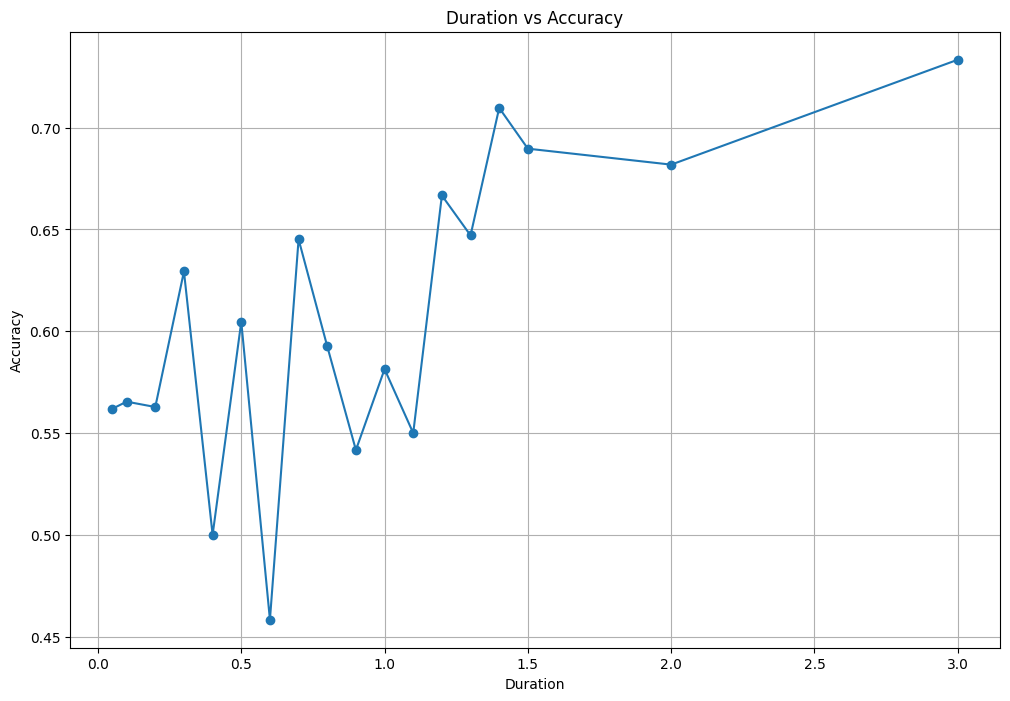

0.7333333333333333


In [24]:
import matplotlib.pyplot as plt

# Initialize lists to store durations and accuracies
durations = []
accuracies = []

# Define a range of durations to try
duration_range = [0.05,0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,2,3]

maxacc = 0

for duration in duration_range:
    epochs=mne.make_fixed_length_epochs(raw_ica, duration = duration, overlap=0,preload=True)
    epochs.drop_bad()  # This will drop bad epochs
    num_epochs = len(epochs)
    
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.signal import welch

    data = epochs.get_data(copy=True)
    sfreq = epochs.info['sfreq']
    n_epochs, n_channels, n_time_points = data.shape

    

    for channel_idx in range(n_channels):
        freqs, psd = welch(data[:, channel_idx, :], fs=sfreq, axis=-1)
        
        avg_psd = np.mean(psd, axis=0)
        
        

    data = epochs.get_data(copy=True) 
    n_epochs, n_channels, n_time_points = data.shape
    plt.figure(figsize=(12, 8))

    for channel_idx in range(n_channels):
        channel_data = data[:, channel_idx, :].flatten()
        time_points = np.arange(n_time_points * n_epochs)
        


    
    import mne

    eeg_data = epochs.get_data()

    condition_ranges = {'lev1': (100/duration, 200/duration),
                        'lev2': (280/duration, 380/duration),
                        'lev3': (420/duration, 520/duration)}

    epochs_by_condition = {}
    selected_epochs = []

    for condition, (start_epoch, end_epoch) in condition_ranges.items():
        start_epoch = int(start_epoch)
        end_epoch = int(end_epoch)
        condition_epochs = epochs[start_epoch:end_epoch+1].copy()
        epochs_by_condition[condition] = condition_epochs
        selected_epochs.append(condition_epochs)

    selected_epochs = mne.concatenate_epochs(selected_epochs)

    for condition, epoch_data in epochs_by_condition.items():
        num_epochs = len(epoch_data)
        print(f"Number of epochs for {condition}: {num_epochs}")

    print(f"Total number of selected epochs: {len(selected_epochs)}")


    condition_of_interest = 'lev1'
    epoch_array_for_condition = epochs_by_condition[condition_of_interest]
    print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")

    condition_of_interest = 'lev1'
    epoch_array_for_condition = epochs_by_condition[condition_of_interest]
    import pandas as pd
    import numpy as np
    from scipy.signal import welch



    def calculate_psd_features(epoch_data, sfreq):
        psd_frequencies, psd_values = welch(epoch_data, fs=sfreq)
        psd_means = np.mean(psd_values, axis=1)  # Calculate mean PSD values for each channel
        psd_variances = np.var(psd_values, axis=1)  # Calculate variance of PSD values for each channel
        psd_std_devs = np.std(psd_values, axis=1)  # Calculate standard deviation of PSD values for each channel

        freq_min = 14
        freq_max = 30

        # Find the indices corresponding to the frequency range of interest
        idx_min = np.argmax(psd_frequencies > freq_min) - 1
        idx_max = np.argmax(psd_frequencies > freq_max)

        # Extract the PSD within the specified frequency range
        psd_values_alpha_band = psd_values[:, idx_min:idx_max]
        psd_means_alpha_band = np.mean(psd_values_alpha_band, axis=1)  # Calculate mean PSD values in alpha band for each channel
        psd_variances_alpha_band = np.var(psd_values_alpha_band, axis=1)  # Calculate variance of PSD values in alpha band for each channel
        psd_std_devs_alpha_band = np.std(psd_values_alpha_band, axis=1)  # Calculate standard deviation of PSD values in alpha band for each channel
        return psd_means_alpha_band, psd_variances_alpha_band, psd_std_devs_alpha_band

    channel_names = epochs.ch_names
    sfreq = epochs.info['sfreq']  # Sampling frequency

    columns = [f'{feature}_{channel}' for feature in ['mean_psd', 'variance_psd', 'standarddev_psd'] for channel in channel_names]
    columns.append('condition')
    feature_df = pd.DataFrame(columns=columns)

    def append_epoch_data(epoch_array, condition_label):
        global feature_df
        for epoch in epoch_array:
            psd_means, psd_variances, psd_std_devs = calculate_psd_features(epoch, sfreq)
            epoch_features = np.concatenate([psd_means, psd_variances, psd_std_devs])
            epoch_features = np.append(epoch_features, condition_label)
            epoch_df = pd.DataFrame([epoch_features], columns=columns)
            feature_df = pd.concat([feature_df, epoch_df], ignore_index=True)

    append_epoch_data(epochs_by_condition['lev1'], 'lev1')
    append_epoch_data(epochs_by_condition['lev2'], 'lev2')
    append_epoch_data(epochs_by_condition['lev3'], 'lev3')

    print("Shape of feature DataFrame:", feature_df.shape)
    print(feature_df.head())

    # Rename columns using a dictionary
    new_column_names = {
        'mean_psd_Fp1': 'mean_psd_Fp1',
        'mean_psd_Fp2': 'mean_psd_Fp2',
        'mean_psd_C3': 'mean_psd_C3',
        'mean_psd_C4': 'mean_psd_C4',
        'mean_psd_P7': 'mean_psd_P7',
        'mean_psd_P8': 'mean_psd_P8',
        'mean_psd_O1': 'mean_psd_O1',
        'mean_psd_O2': 'mean_psd_O2',
        'mean_psd_F7': 'mean_psd_F7',
        'mean_psd_F8': 'mean_psd_F8',
        'standarddev_psd_Fp1': 'stddev_psd_Fp1',
        'standarddev_psd_Fp2': 'stddev_psd_Fp2',
        'standarddev_psd_C3': 'stddev_psd_C3',
        'standarddev_psd_C4': 'stddev_psd_C4',
        'standarddev_psd_P7': 'stddev_psd_P7',
        'standarddev_psd_P8': 'stddev_psd_P8',
        'standarddev_psd_O1': 'stddev_psd_O1',
        'standarddev_psd_O2': 'stddev_psd_O2',
        'standarddev_psd_F7': 'stddev_psd_F7',
        'standarddev_psd_F8': 'stddev_psd_F8'
    }

    # Rename columns using the rename() method
    feature_df.rename(columns=new_column_names, inplace=True)
    # Train the classifier and calculate accuracy
    X = feature_df.drop(columns=['condition'])
    y = feature_df['condition']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append duration and accuracy to lists
    durations.append(duration)
    accuracies.append(accuracy)
    maxacc = max(maxacc , accuracy)

# Plot duration vs accuracy
plt.plot(durations, accuracies, marker='o')
plt.xlabel('Duration')
plt.ylabel('Accuracy')
plt.title('Duration vs Accuracy')
plt.grid(True)
plt.show()

print(maxacc)